In [13]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
from Rk4 import solver


#constants
G=4*np.pi**2
Msun = 1.98855e30 # Solar mass in kg
au = 1.49598261e11 # 1 au in meters
year= 3600*24*365

#vy=6.27776068
#vy=7.02483055
#vy=7.69530476
vy=8.31187496



#initial conditions 
x=np.array([0,1])
y=np.array([0,0])
z=np.array([0,0])
vx=np.array([0,0])
vy=np.array([0,vy])
vz=np.array([0,0])
mass=np.array([1,3.00273e-6])

#number of objects
m=len(mass)



#time grid
dt=0.01
t=np.arange(0,1e3+dt,dt)

#number of points
N=len(t)

#saving coordinates and velocity as six consecutive vectors
q=np.ones((m,6*N))



Total_Energy=np.zeros(N)
Total_L=np.zeros(N)
#initial conditions
q[:,:6] = np.array((x,y,z,vx,vy,vz)).transpose()


#equations
def ODE(t,q,mass):
    #number of planets
    n=len(mass)
    f=np.zeros_like(q)
    
    #x equation
    f[:,:3]=q[:,3:]
    
    #v equation
    for i in range(n):
        for j in range(n):
            if i==j:
                pass
            else:
                xij=q[i,:3]-q[j,:3]
                f[i,3:]+=-G*mass[j]*xij/(np.linalg.norm(xij)**3)
    return f

#energy
def total_energy(q,mass):
    m=len(mass)
    KE=0.
    PE=0.
    
    for i in range(m):
        KE+=mass[i]*(np.dot(q[i,3:],q[i,3:]))/2
        for j in range(i):
            xij=q[i,:3]-q[j,:3]
            PE+=-G*mass[i]*mass[j]/np.linalg.norm(xij)
        
    
    return KE+PE

def total_l(q,mass):
    m=len(mass)
    L=0.
    
    for i in range(m):
        r, v=q[i,:3],q[i,3:]
        L+=np.linalg.norm(np.cross(r,mass[i]*v))
    return L

#time evolution
for i in range(1,N):
    q[:,6*(i):6*(i+1)]=solver(dt,t,q[:,6*(i-1):6*i],lambda t,x:ODE(t,x,mass))

    
#Energy     
for i in range(N):
    Total_Energy[i]=total_energy(q[:,6*(i):6*(i+1)],mass)
    
#L   
for i in range(N):
    Total_L[i]=total_l(q[:,6*(i):6*(i+1)],mass)
    

#indexes to access the coordinates and velocities
indx_x=[i for i in range(6*N) if i%6==0]
indx_y=[i for i in range(6*N) if i%6==1]
indx_z=[i for i in range(6*N) if i%6==2]
indx_vx=[i for i in range(6*N) if i%6==3]
indx_vy=[i for i in range(6*N) if i%6==4]
indx_vz=[i for i in range(6*N) if i%6==5]



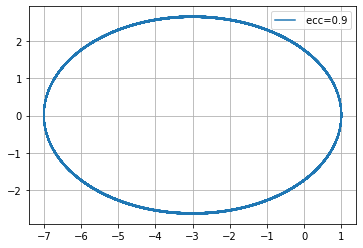

In [14]:
plt.plot(q[1,indx_x],q[1,indx_y],label=f" ecc={0.9}")

plt.legend()
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f"rk4_{0.9}ecc.jpeg")
plt.show()

In [7]:
Total_Energy[0]

-5.9373815129054047e-05

In [3]:
#initial conditions 
x=np.array([0,1])
y=np.array([0,0])
z=np.array([0,0])
vx=np.array([0,0])
vy=np.array([0,6.27776068])
vz=np.array([0,0])
mass=np.array([1,3.00273e-6])
q0= np.array((x,y,z,vx,vy,vz)).transpose()
def ecc(q,mass,v,e0=0):
    #set vy velocity
    q0[1,4]=v
    E=total_energy(q,mass)
    L=total_L(q,mass)
    miu=(mass[0]*mass[1])/(mass[0]+mass[1])
    e=np.sqrt(1+(2*E*L**2)/(miu*(G*mass[0]*mass[1])**2))
    return e-e0

In [9]:
from scipy import optimize 
optimize.newton(lambda x:ecc(q0,mass,x,0.7),7)
vy_init=np.zeros(4)
ecc0=[0.25,0.5,0.75,0.9]
for i in range(4):
    vy_init[i]=optimize.newton(lambda x:ecc(q0,mass,x,ecc0[i]),7)

In [19]:
vy_init

array([7.02483055, 7.69530476, 8.31187496, 8.66077398])

In [15]:
def delta_a(b):
    delta=np.abs(b[1:]-b[:-1]/b[:-1])
    return delta

delta_E=delta_a(Total_Energy)
delta_L=delta_a(Total_L)

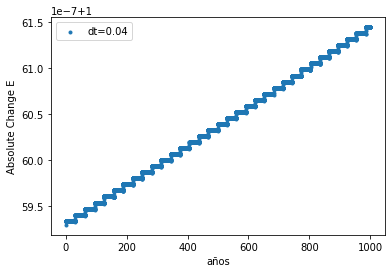

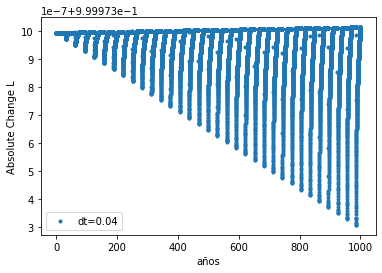

In [16]:

plt.figure()
plt.scatter(t[1:],delta_E ,marker=".",label=f"dt={dt}")
plt.xlabel("años")
plt.ylabel("Absolute Change E")
plt.legend()
plt.savefig(f"Rk4_{dt}_E.jpeg")
plt.show()
plt.scatter(t[1:], delta_L,marker=".",label=f"dt={dt}")
plt.xlabel("años")
plt.ylabel("Absolute Change L")
plt.legend()
plt.savefig(f"Rk4_{dt}_L.jpeg")
plt.show()